<a href="https://colab.research.google.com/github/Avit-hodibu/Ensemble_learning/blob/main/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble learning
collection of machine learning models.


**wisdom of the crowd**
Answer given by crowd is correct.


Prediction:
we have different base ML(any models like decision tree, regression, SVM etc) algo models. Fhese collective models is called ensemble model. These model need to different by data or algo.

In classification problem, if more model is saying it belong to some class than other. Then majority answer come from model is pick as correct.

In regression problem, the output come from each model is taken mean. This mean is answer.




**Types of Ensemble learning**
1. Voting ensemble: Base model are different algorithm(like, model 1= SVM, model 2 = LoR, model 3 = DT ) and same data set. We give same queries to all models. And take the majority count.

2. Bagging(Random Forest): Bootstrapped aggregation. same algorithm but have different dataset.

  For eg: we have 1000 dataset and make 3 model of same algo (SVM). we randomly take 500 dataset and put in model1 and another 500 randomly in another model2 and another 500 in model3. We take the mean of it.

  Random forest is especial case of bagging where Decision Tree is use. That is why name is forest a collection of trees

3. Boosting(Adaboosting, Gradient boosting, XgBoosting): Most powerful technique. We take same model algo. we put data on model1 and it will notedown what are the mistakes. It tell all the mistake to the model that is after him and give data too . So, it can improve from mistake. It will do same note the mistake and give it to another model. It will again improve from mistake. It work on series and improve the mistake.

4. Stacking: Base model are different algorithm(like, model 1= SVM, model 2 = LoR, model 3 = DT ) and same data set.  There is another model below that base model which will in herite all the answer of the base models and assign weight according to there correctness prediction. more the base model predict correct have the high weight than other. We give same queries to all models.

AD:
1. improvement in performance
2. low bias and low variance
3. robustness

Dis:
1. computational complexity increase

When to use = always

## Voting ensemble


Our models are train with same data. When the system is train the model is ready for prediction. Now, we call new queries data . We send Yq to all model. classification(The answer that comes from all models is counted. And we pick the majority.) regression (we take a mean of the answer)

Assumption:
1. All models should be independent to perform better. If the model are similar it wont perform good.
2. all models accuray should be more than 50%

Can we created strong model using weak models(model have accuracy aleast 51%)?

-> Accuracy increase as added independent model by little.

if accuray less than 50 then adding more model will decrease it's accuracy rather than increaseing.


### Voting Classifier:

We count majority from the models as the answer.


Voting type:

1. Hard voting:
if in model1,  0 has 0.6 prob and 1 has 0.4 then we see model1 predict 0. and in model2, 0 has prob as 0.8 and 1 has 0.2 then we see model2 perdict 0. So, overll will be 0.

2. Soft voting:
if in model1,  0 has 0.6 prob and 1 has 0.4 and in model2, 0 has prob as 0.8 and 1 has 0.2 then we will add 0 probability and 1 probablity of all model, model1 and model2.

  0 proba = (0.6 + 0.8)/2 = 0.7

  1 proba = (0.4 + 0.2)/2 = 0.3

  then only since 0 has high prob so 0 is answer.

Most of the time soft voting is better than hard voting.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#all models
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

#model
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

#voting classifier
from sklearn.ensemble import VotingClassifier

#hard
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

#soft
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

Weight voting:
```
# model1 = 1 , model2= 2 and model3 =3 weight
VotingClassifier(estimators=estimators,voting='soft', weights=[1, 2, 3])
```

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [ ]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


As you can see it is performing better.

### Voting Regression:


We will take a mean of answers from model and the mean will be answer.

In [ ]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

## Bagging



Bootstraping + Aggregation = bagging

Bootstraping = from given population we draw sample randomly.

Lets take a dataset D10k rows. This is classification. We take multiple base model be m1, m2, m3, m4, ... m100. we make sure all model algorithm are same. we train these models with different part of the dataset D1,D2,...D100 that is 1k each by sampling(it can be with replacement and without replacement also). Each model will be train by different dataset. This is bootstraping

Aggregation=

Now, We have a queries. We give this queries to all the model and get the answers from each model. The we pick the majority count as answer. This is aggregation

Why this work?

-> Bias and Variance are negatively correlated. But when we use bagging Low
bias and low variance is possible.

Impact of the noise data is distributed to different models while sampling the data.So, the result will have less noise.



In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# removing some col
# making binary so remove data of target 0
df = df[df['target'] != 0][['sepal width (cm)','petal length (cm)','target']]
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


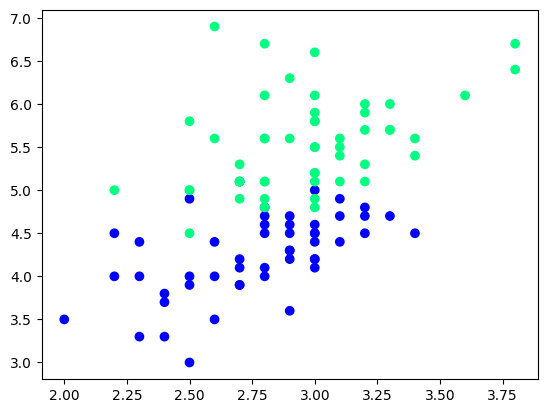

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'],cmap='winter')

In [ ]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
102,3.0,5.9,2
102,3.0,5.9,2
123,2.7,4.9,2
136,3.4,5.6,2
70,3.2,4.8,1
73,2.8,4.7,1
137,3.1,5.5,2
55,2.8,4.5,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()


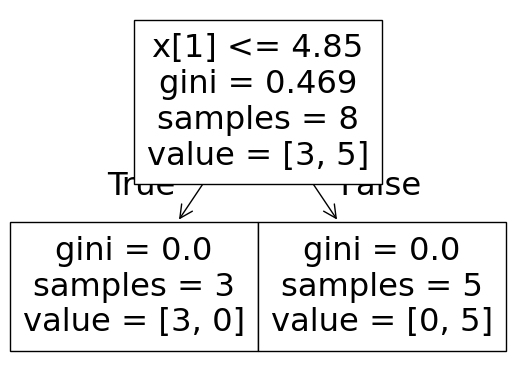

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


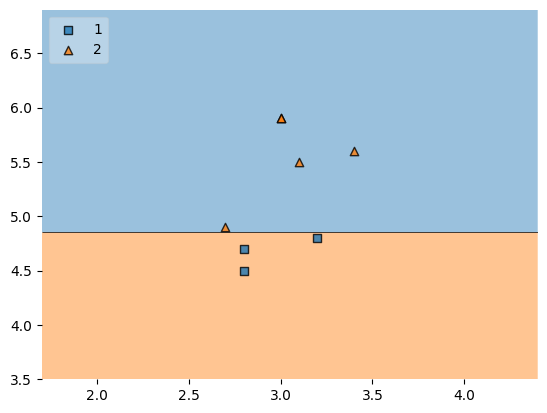

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
evaluate(dt_bag1,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
101,2.7,5.1,2
101,2.7,5.1,2
51,3.2,4.5,1
51,3.2,4.5,1
137,3.1,5.5,2
123,2.7,4.9,2
55,2.8,4.5,1
137,3.1,5.5,2


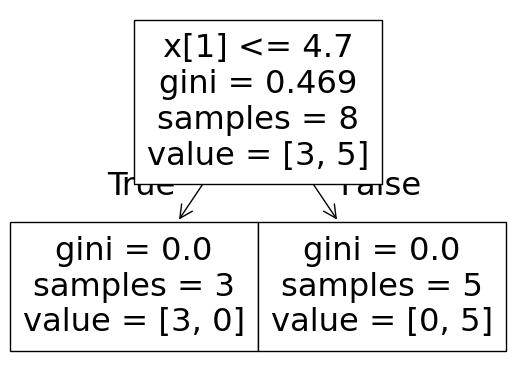

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


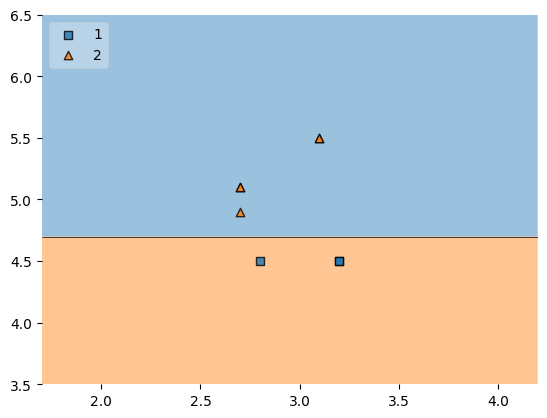

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
106,2.5,4.5,2
55,2.8,4.5,1
106,2.5,4.5,2
101,2.7,5.1,2
106,2.5,4.5,2
51,3.2,4.5,1
102,3.0,5.9,2
55,2.8,4.5,1


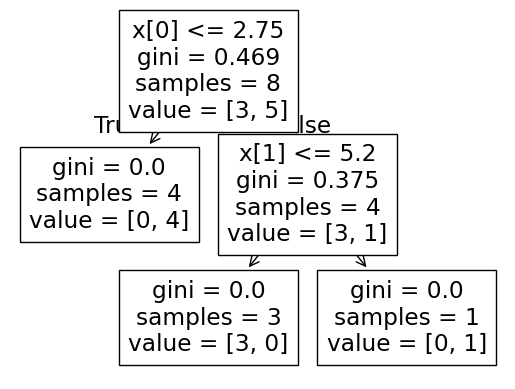

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


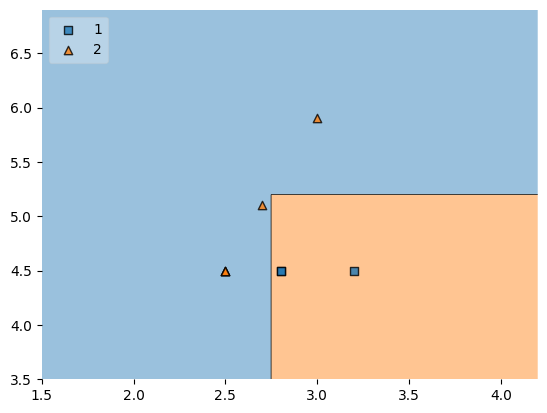

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

**predict**

In [ ]:
df_test

,sepal width (cm),petal length (cm),target
79,2.6,3.5,1
130,2.8,6.1,2
121,2.8,4.9,2
85,3.4,4.5,1
129,3.0,5.8,2


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


since majority is 2 so answer is 2

**Pasting**

In [ ]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),target
101,2.7,5.1,2
55,2.8,4.5,1
123,2.7,4.9,2
73,2.8,4.7,1
136,3.4,5.6,2
137,3.1,5.5,2
70,3.2,4.8,1
106,2.5,4.5,2
51,3.2,4.5,1
102,3.0,5.9,2


In [ ]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
70,3.2,4.8,1
55,2.8,4.5,1
102,3.0,5.9,2
101,2.7,5.1,2
123,2.7,4.9,2
51,3.2,4.5,1
136,3.4,5.6,2
106,2.5,4.5,2


**Random Subspaces**
col sampling, not row

In [ ]:
df1.sample(2,replace=True,axis=1)

**Random Patches** row and col both sampling

In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

### Bagging Classifers

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.8545


**Bagging**

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
    )
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test,y_pred)

0.9035

**Pasting**

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1 # multi core use
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   24.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Pasting classifier 0.9035


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.5s finished


**Random Subspaces**

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.8955


**Random Patches**


In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.9


**OOB score (Out Of Bag)**: while sampling without replacement, these data are not seen in sampling data from the dataset.

these data is use to check performance of the model accuracy.  

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)
bag.fit(X_train,y_train)
bag.oob_score_

0.907375

In [ ]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.904


**Bagging tips**

- baaging generally gives better result than pasting
- good result comes around 25% to 50% roe sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- to find correct hyperparameter values we can do GridSearchCV/RandomSearchCV

**GridSearchCV** it give best parameter

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50,100,500],
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [ ]:
search.best_score_

In [ ]:
search.best_params_

### Bagging regressor

We take mean here.

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

### Random Forest

It is a collection of trees

It is a algorithm that give better result in all types of algorithm even without turning. It is used for both regressor and classifier.

Random = Bagging techinque -> bagging come from bootstrapped Aggregation -> bootstrapped is sampling which is random.

Forest = multiple DT train

In bagging if we use DT then it is random forest.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.890269,-1.247332,-2.134747,3.322125,0.673388,1
1,2.444568,-0.192633,4.907083,4.444178,-3.548695,0
2,2.079141,1.112688,-1.009546,-0.560581,-1.125618,1
3,-0.905353,0.045377,0.810364,1.063607,-2.308008,0
4,-0.576579,0.432982,2.971421,4.476445,-2.553479,0


In [2]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [7]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [8]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-6-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-6-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-6-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [9]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col5', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [11]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [13]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9166666666666666, 'x[1] <= -0.422\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.2222222222222222, 0.75, 'x[0] <= -0.671\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.3333333333333333, 0.8333333333333333, 'True  '),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.6666666666666666, 0.75, 'x[1] <= 0.843\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.5555555555555556, 0.8333333333333333, '  False'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[1] <= 0.588\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[1] <= 0.629\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777

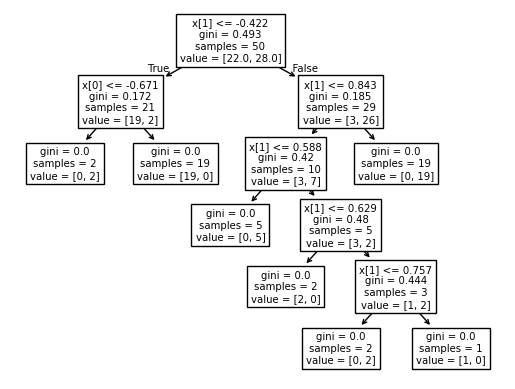

In [14]:
plot_tree(clf1)

[Text(0.4583333333333333, 0.9285714285714286, 'x[0] <= -0.227\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[0] <= -1.383\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.3125, 0.8571428571428572, 'True  '),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.25, 0.6428571428571429, 'x[0] <= -1.04\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 1.771\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.7857142857142857, 'x[0] <= 1.041\ngini = 0.453\nsamples = 26\nvalue = [9, 17]'),
 Text(0.6041666666666666, 0.8571428571428572, '  False'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[0] <= 0.

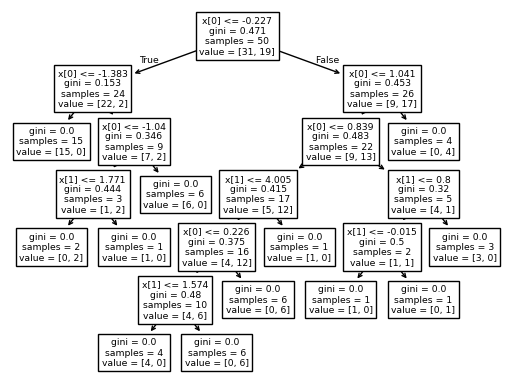

In [15]:
plot_tree(clf2)

[Text(0.4, 0.875, 'x[0] <= -0.232\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[0] <= 0.749\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 0.491\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]')]

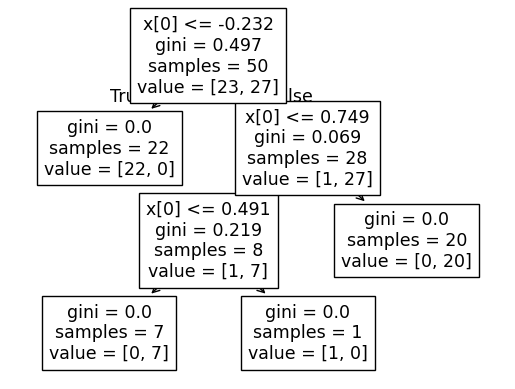

In [16]:
plot_tree(clf3)